<a href="https://colab.research.google.com/github/weissd2k/Suzie-2020-21/blob/main/Beta_and_delta_calculation_code_Suzie_220811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Run the cells below once everytime you restart the notebook
#### (must run, every time opening the notebook)

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

In [ ]:
# Setting constants
k=1.38064852*10**(-23) #Boltzman's constant
h=6.62607004*10**(-34) #Plank's constant
c=3e10 #Speed of light in cm/s

def beta(table,temp):
    a=np.log(table[1]/table[0])
    bi=h*table[0]*c/(k*temp)
    bj=h*table[1]*c/(k*temp)
    qi=(-bi/2)-np.log(1-np.exp(-bi))
    qj=(-bj/2)-np.log(1-np.exp(-bj))
    result=1000*(a+qj-qi)
    i=result.sum()
    
    return i

def CheckInput(checks):
    print(checks.head())
    print()
    print('Number of frequencies: ', checks.shape[0])
    print()
    print('Are there invalid inputs?')
    if checks[0].dtypes == 'float64' and checks[1].dtypes =='float64':
        print('No')
    else:
        print('Yes, please check that there are no missing numbers in your input file')

    print()
    print('Are there any nagetive frequencies?')
    negative = 'No'
    for i in checks:
        if i< 0:
            negative = 'Yes'
    print(negative)
    
def Display_result(l):
    lot=[a for a in range (min_temp,max_temp,inc)]
    print('(Temperature,','Part func)')
    for line in list(zip(lot,l)):
        print (line)
        
def plt_dB(lnA,lnB,d_total,fb):
    dA_B= [i-j for i,j in zip(lnA,lnB)]
    dB=[d_total+(fb/100 -1)*(k) for k in dA_B]
    dA=[i-j for i,j in zip(dA_B,dB)]
    plt.plot(x,dB)
    
def plt_dA(lnA,lnB,d_total,fb):
    dA_B= [i-j for i,j in zip(lnA,lnB)]
    dB=[d_total+(fb/100 -1)*(k) for k in dA_B]
    dA=[i+j for i,j in zip(dA_B,dB)]
    plt.plot(x,dA)

def print_dB(lnA,lnB,d_total,fb):
    dA_B= [i-j for i,j in zip(lnA,lnB)]
    dB=[d_total+(fb/100 -1)*(k) for k in dA_B]
    dA=[i-j for i,j in zip(dA_B,dB)]
    for line in list(zip(x,dB)):
        print (line)
    
def print_dA(lnA,lnB,d_total,fb):
    dA_B= [i-j for i,j in zip(lnA,lnB)]
    dB=[d_total+(fb/100 -1)*(k) for k in dA_B]
    dA=[i+j for i,j in zip(dA_B,dB)]
    for line in list(zip(x,dA)):
        print (line)
    
def Setup_plot():
    x=input("Enter the label for x-axis: ")
    y=input("Enter the label for y-axis: ")
    t=input("Enter the title of the graph")
    return x,y,t

## 1. Inputing information
*frequency data should be in a **separate plain text file** in the **same folder** as this python script*

Frequency data should have the following format:
> column 1: frequency of the light isotope 
>
> column 2: frequency of the heavy isotope 

- Each line should contain only 1 pair of frequency data, separated by one Tab (2 adjecent columns copy and pasted straight from excel spreadsheet always fulfills this requirement, even if you see grey lines rather than empty spaces)
- Do not include texts, even headings



### 1.1 Read in frequency data file 
#### (must run, every time have new frequency file)
In the cell below, replace 'myFileName.txt' with the name of your frequency data file

* To add the number of data files, simply copy and paste the line and give it a **new and unique** name. 
    * The name of the variable must be one single word, starting with a letter, and consists of only letter, number and '_'
    * eg. Zn_Cit_1=pd.read_csv('myFileName.txt',sep='\t',header=None)
* You can change the name of the variable to anything you wish, just remember to **change it in all subsequent codes**

In [ ]:
'''The line below is an example of what you can change
   Remove the # and Enter your filename and variable name to input your frequency data'''

#Example_nameOfVariable_1 =pd.read_csv('myFileName.txt',sep='\t',header=None)


'''The lines below are examples of input file with my ZnSO4 isomers A to G.
   They are here as an example of of working files and 
   what you should expect from correctly running code.
   Keep them here so you can test your subsequent codes'''

A=pd.read_csv('ZnSO4_A.txt',sep='\t',header=None)
B=pd.read_csv('ZnSO4_B.txt',sep='\t',header=None)


### 1.2 Check if data have been corrected inputed
#### (should run, first time inputting file)

Run the cell below, replace A in the first row with your variable name

You should check:
1. If the numbers in the table matches with the numbers in your frequency file (Only the first 5 lines are shown. Ignore the 0 and 1s, they are autogenerated headings and index.) 
2. The number of frequencies recorded is what you would expect
3. The answer to the questions are all '**No**'

In [ ]:
"""Replace A in the following row with your variable name"""
CheckInput(A)

          0         1
0   50.3081   50.2622
1   94.1328   93.7899
2  131.0562  130.9022
3  236.0001  235.8836
4  297.0778  296.4345

Number of frequencies:  48

Are there invalid inputs?
No

Are there any nagetive frequencies?
No


## 2 Calculate and plot $\beta$ 



### Before you start, enter the temperature range you wish to carry out calculation. 
#### must run, every time changing temperature range
Every time you change the temperatures, you must rerun all the cells below for the calculations to run correctly

Within the temperature range you entered, 1000ln$\beta$ will be calculated every 100K (OR whatever you set 'inc' to)

**Always add 1 to your upper temperature limit!!**
**The unit of the calculations is K. Manually add 273.13 if you wish to use $\circ$C**

In [ ]:
'''Set your temperatures here'''
min_temp=200 #Lower limit of the temperature range
max_temp=1401 #Upper limit of the temperature range, 
inc=100 #Calculate beta every 100K

# Setting the X axis for graph plotting
x=[i for i in range (min_temp,max_temp,inc)]
x_smth = np.linspace(min(x), max(x), 300)

### 2.1 Calculate 1000ln$\beta$ 
#### must run, every time you change anything in any cells above this one

Run the cell below to calculate 1000ln$\beta$ and store it in a list. For example, in:
>ya=[beta(A,i) for i in range (min_temp,max_temp,inc)]

'ya' is the list of 1000ln$\beta$ values, A is the table of frequencies

**You should always add additional lines rather than replacing lines**, unless you are sure that the 1000ln$\beta$ values will not be used in any further calculations. 

This is important to ensure figure plottings can run error free

In [ ]:
ya=[beta(A,i) for i in range (min_temp,max_temp,inc)]
yb=[beta(B,i) for i in range (min_temp,max_temp,inc)]
yc=[beta(C,i) for i in range (min_temp,max_temp,inc)]
yd=[beta(D,i) for i in range (min_temp,max_temp,inc)]
ye=[beta(E,i) for i in range (min_temp,max_temp,inc)]
yf=[beta(F,i) for i in range (min_temp,max_temp,inc)]
yg=[beta(G,i) for i in range (min_temp,max_temp,inc)]

### 2.2 Show the calculation results
#### Does not affect any other codes, only run when you need the information
- Use the Display_result(ya) command to show temperature and 
- Use the print(ya) command to show a list of partition function ratios

In [ ]:
Display_result(ya)

(Temperature, Part func)
(200, 8.64075679013903)
(300, 4.118576799062717)
(400, 2.3884802258746056)
(500, 1.552933645503296)
(600, 1.0881924913158196)
(700, 0.8038951854721643)
(800, 0.6176440217879192)
(900, 0.4891451124754074)
(1000, 0.39682904204602076)
(1100, 0.32831434835358525)
(1200, 0.2760871409035054)
(1300, 0.23537577028896056)
(1400, 0.2030334269996284)


### 2.2 Plotting 1000ln$\beta$ 
#### Does not affect any other codes, only run when you need the information

1. Under the section $\#$ Plot 
    - Replace 'ya', 'yb' etc. for the your list of 1000ln$\beta$ lists
    - Have a separate line of code for each 1000ln$\beta$ value you want to plot
    - Change marker = to get apply a different shaped dot
        - A list of markers can be found at: https://matplotlib.org/stable/api/markers_api.html
    - Change c= to use a different colour
        - A list of colours can be found at: https://matplotlib.org/stable/gallery/color/named_colors.html
        
2. under legends, change the name of the legends to what you want to display. 
    - Note that the number of elements in the legend list must match the number of lines you plot
    
3. Run the code, enter the x axis label, y axis label and title as asked
    - To write 1000ln $\beta_i$, see the comment at the end of the next cell
    - To include special characters, check on: https://matplotlib.org/3.1.1/tutorials/text/mathtext.html
    
**!!Important!!**
**DO NOT** rerun the cells before it produces a graph - This can cause the program to stuck in an endless loop

If you want to change a value you entered, enter random things to produce a graph first, then rerun the cell

Enter the label for x-axis: Temperature (K)
Enter the label for y-axis: $1000ln \beta$
Enter the title of the graph$1000ln \beta$ of $ZnSO_4·4H_2O$ against Temperature


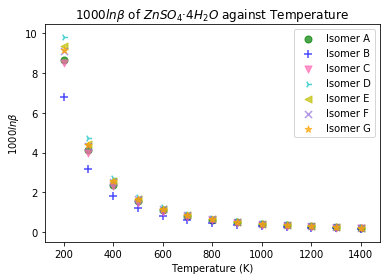

In [ ]:
# Plot
plt.scatter(x,ya,marker='o',c='g',s=50,alpha=0.7)
plt.scatter(x,yb,marker='+',c='b',s=50,alpha=0.7)
plt.scatter(x,yc,marker='v',c='hotpink',s=50,alpha=0.7)
plt.scatter(x,yd,marker='4',c='c',s=50,alpha=0.7)
plt.scatter(x,ye,marker='<',c='y',s=50,alpha=0.7)
plt.scatter(x,yf,marker='x',c='mediumpurple',s=50,alpha=0.7)
plt.scatter(x,yg,marker='*',c='orange',s=50,alpha=0.7)

# legends
legends=['Isomer A','Isomer B','Isomer C','Isomer D','Isomer E','Isomer F','Isomer G']


#ignore
xlab,ylab,titleName=Setup_plot()
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(titleName)
plt.legend(legends)
plt.show()

#To write 1000ln beta, write: 1000ln$\beta$
#To write subscript,use _ inside the $$ part
#Example: $1000ln \beta$ of $ZnSO_4·4H_2O$ against Temperature

### 2.3 Plotting interpolating curve 
#### Does not affect any other codes, only run when you need the information


1. Under the first $\#$, Change the list names to the lists you wish to use. Set legends
2. Run the code and write in x-axis label, y-axis label and title as before

You can ignore everything else

===================================================

This cell is more complicated, if you want to add more lines to the figure, try to follow the $\#$ in the cell below or ask me for help :) 

A bit information on the generation of interpolating curve:
> The *make_interp_spline(x, i)* command uses **Cubic Spline Interpolation** (by default) to try to produce a smooth curve. 
>
> Alternatively, enter a whole number at k= in *make_interp_spline(x, i, k=)*, to specify the B-spline degree
>
> More information on generating the curve, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.make_interp_spline.html
>
> More information on the mathematical functioin used, see: https://en.wikipedia.org/wiki/B-spline

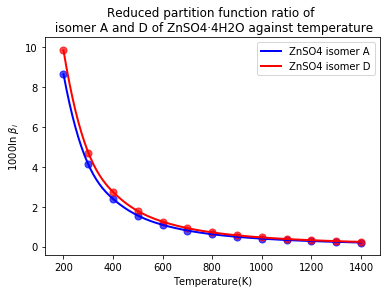

[(200, 8.64075679013903, 9.837176957203715), (300, 4.118576799062717, 4.709696314885943), (400, 2.3884802258746056, 2.734807499481268), (500, 1.552933645503296, 1.779769731170111), (600, 1.0881924913158196, 1.2483735436560095), (700, 0.8038951854721643, 0.9231855209974049), (800, 0.6176440217879192, 0.7100314495786728), (900, 0.4891451124754074, 0.5628677306611034), (1000, 0.39682904204602076, 0.45705594148438833), (1100, 0.32831434835358525, 0.3784565529718828), (1200, 0.2760871409035054, 0.3184892907485584), (1300, 0.23537577028896056, 0.27170450344080316), (1400, 0.2030334269996284, 0.23450706440470911)]


In [ ]:
# Change ya and yb to your 
i=ya
j=yb
legends=['ZnSO4 isomer A','ZnSO4 isomer D']

# Set up for best fit line plotting
i_interp = make_interp_spline(x, i)
j_interp = make_interp_spline(x, j)
i_smth = i_interp(x_smth)
j_smth = j_interp(x_smth)

# Figure plotting - the points
plt.scatter(x,i,c='b',alpha=0.7, s=50)
plt.scatter(x,j,c='r',alpha=0.7, s=50)
# Figure plotting - best fit line
plt.plot(x_smth,i_smth, linewidth=2, c='b')
plt.plot(x_smth,j_smth, linewidth=2, c='r')

#Formatting plot, can ignore
xlab,ylab,titleName=Setup_plot()
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(titleName)
plt.legend(legends)
plt.show()

#Printing out: (temperature, lnB for isomer 1, inB for isomer 2)
print(list(zip(x,i,j)))

## 3. $\Delta$ calculation
#### must run, when changes are applied to any above cells

(The cell below contains input of ZnCl2's frequency data and subsequent calculations. This is to allows examples in further calculations to work. You can remove the cell if you no longer need the example)

In [ ]:
Cl2=pd.read_csv('ZnCl2_A.txt',sep='\t',header=None)
ycl2=[beta(Cl2,i) for i in range (min_temp,max_temp,inc)]

### 3.1 Calculating $\Delta$
#### must run, when changes are applied to any above cells

In the cell below, Change A and B *k=[a-b for a,b in zip(ycl2,ya)]* where A and B are the reactant and product in $\Delta$ calculation (ZnCl2 and ZnSO4 in this example)

The *print(list(zip(x,k)))* command shows (temperature,$\Delta$) at all temperature intervals

To plot more/less lines, add more *VariableName=[a-b for a,b in zip(A,B)]* command, change the VariableName to something which does not overlap any variables that have been used. 

 <font size="1"> Remember, you also need to add more interpolating commands to the plotting part in order to plot more lines</font>



In [ ]:
k=[a-b for a,b in zip(ycl2,ya)]
l=[a-b for a,b in zip(ycl2,yd)]
print(list(zip(x,k)))

[(200, -2.0454528280147635), (300, -0.9572880052514385), (400, -0.5569477490069801), (500, -0.36386593721238203), (600, -0.2558613686367943), (700, -0.18941012223821008), (800, -0.1456817073625799), (900, -0.11541896465929602), (1000, -0.0936344197016159), (1100, -0.0774477374259272), (1200, -0.0651019563848304), (1300, -0.0554767500767564), (1400, -0.04783096500033529)]


### 3.2 Plotting $\Delta$
#### Does not affect any other codes, only run when you need the information
The cell below plots the delta value(s) in smooth curve(s). 

It uses the same interpolating method as the previous section(2.3)

1. Enter the list of legends
2. Run the code straight away, or modify as before for more/less lines to plot
3. Enter the axis labels and figure title like before

Enter the label for x-axis: x
Enter the label for y-axis: y
Enter the title of the graphtitle


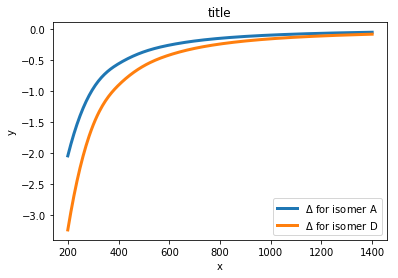

In [ ]:
#Set legends
legends=['$\Delta$ for isomer A','$\Delta$ for isomer D']

# Set up for best fit line
k_interp = make_interp_spline(x, k)
k_smth = k_interp(x_smth)
l_interp = make_interp_spline(x, l)
l_smth = l_interp(x_smth)

#Figure set up
plt.plot(x_smth, k_smth,linewidth=3)
plt.plot(x_smth, l_smth,linewidth=3)
xlab,ylab,titleName=Setup_plot()
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(titleName)
plt.legend(legends)
plt.show()

## 4. Isotope signature calculation


### 4.1 $\delta$ calculation and plot

**Explaination of commands:**

This lines loops over all temperature range
> for i in range(starting % of product, end % of product+1,steps)



This command **calculates and plots** $\delta product$
> plt_dB(ln_reactant,ln_product,$\delta total$,i)



This command **calculates and plots** $\delta reactant$
> plt_dA(ln_reactant,ln_product,$\delta total$,i)




Enter the label for x-axis: Temperature (K)
Enter the label for y-axis: $\delta$ ZnSO4
Enter the title of the graphIsotopic composition for $\delta$ ZnSO4 at different temperature


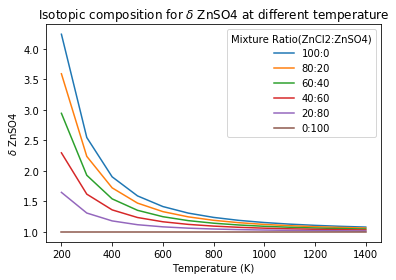

In [ ]:
# Isotope signature calculation and plot for product
for i in range (0,101,20):
    plt_dB(ycl2,yd,1,i)

# Plot
xlab,ylab,titleName=Setup_plot()
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(titleName)
plt.legend(['100:0','80:20','60:40','40:60','20:80','0:100'],title='Mixture Ratio(ZnCl2:ZnSO4)')

plt.show()

Similarly, the figure can be plotted for the reactant, using the command: 
> plt_dA

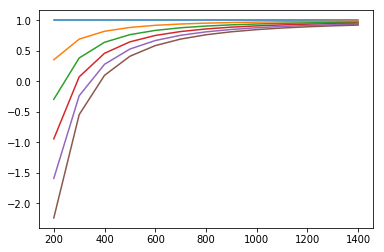

In [ ]:
#example of plotting $\delta$A
for i in range (0,101,20):
    plt_dA(ycl2,yd,1,i)

### 4.2 $\delta$ calculation and display value

Use the following commands to show values of $\delta$ reactant(dA) or $\delta$ product(dB) at every temperature for a specific precentage of the product
> print_dA(ln reactant,ln product,delta_total,% of product)

> print_dB(ln reactant,ln product,delta_total,% of product)


The output displays as (Temperature,$\delta$)

In [ ]:
print_dA(ycl2,yd,1,20)

(200, 0.3516254009841102)
(300, 0.6903184957850672)
(400, 0.8193449954772716)
(500, 0.8818595954241606)
(600, 0.9167915158046032)
(700, 0.9382599084473098)
(800, 0.9523861729693333)
(900, 0.9621716834310017)
(1000, 0.9692277361720033)
(1100, 0.974482011591155)
(1200, 0.9784991787540234)
(1300, 0.9816389033542801)
(1400, 0.9841390795189169)


In [ ]:
print_dB(ycl2,yd,1,20)

(200, 3.593498396063559)
(300, 2.2387260168597316)
(400, 1.722620018090914)
(500, 1.4725616183033576)
(600, 1.3328339367815873)
(700, 1.2469603662107605)
(800, 1.1904553081226668)
(900, 1.1513132662759937)
(1000, 1.1230890553119868)
(1100, 1.1020719536353798)
(1200, 1.0860032849839067)
(1300, 1.073444386582879)
(1400, 1.063443681924333)
